# Tsunami vs Non-Tsunami Earthquakes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

In [3]:
# Load the CSV file
df = pd.read_csv("earthquake_data_tsunami.csv")

In [4]:
print("First five rows of dataset:")
display(df.head())

print("\nDataset info:")
df.info()

First five rows of dataset:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [8]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

# Time Based Analysis

### Explore how earthquake occurrences and tsunami events have changed over the 22 periods (2001-2022)

In [13]:
#  Group by Year — count total, tsunami, and non-tsunami events
yearly_earthquakes = df.groupby("Year").size()
yearly_tsunami = df.groupby("Year")["tsunami"].sum()
yearly_non_tsunami = yearly_earthquakes - yearly_tsunami

In [14]:
#Combine results into one DataFrame for clear view
summary = pd.DataFrame({
    "Total_Earthquakes": yearly_earthquakes,
    "Tsunami_Events": yearly_tsunami,
    "Non_Tsunami_Events": yearly_non_tsunami
})
display(summary)

,Total_Earthquakes,Tsunami_Events,Non_Tsunami_Events
Year,,,
2001,28,0,28
2002,25,0,25
2003,31,0,31
2004,32,0,32
2005,28,0,28
2006,26,0,26
2007,37,0,37
2008,25,0,25
2009,26,0,26


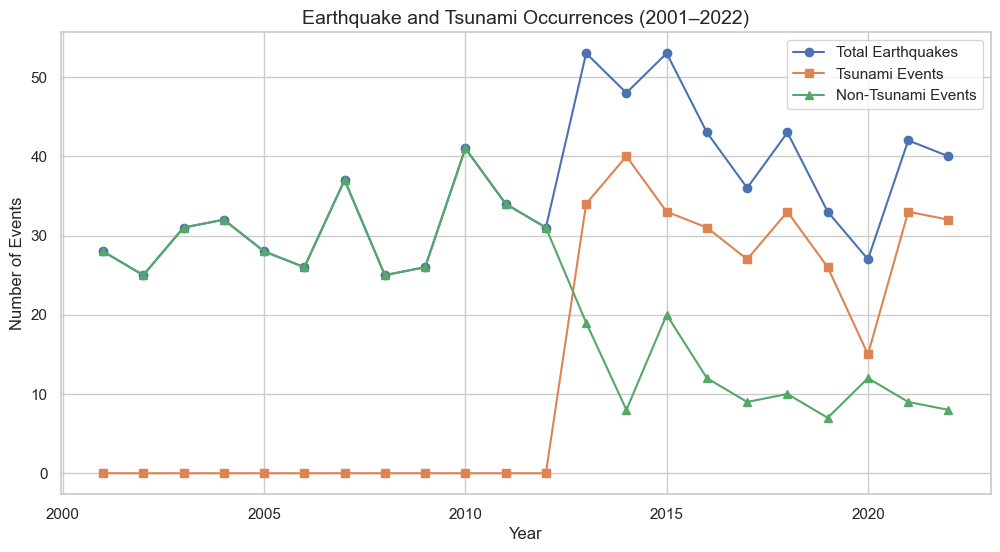

In [15]:
# Plot yearly trends
plt.figure(figsize=(12,6))
plt.plot(summary.index, summary["Total_Earthquakes"], marker='o', label="Total Earthquakes")
plt.plot(summary.index, summary["Tsunami_Events"], marker='s', label="Tsunami Events")
plt.plot(summary.index, summary["Non_Tsunami_Events"], marker='^', label="Non-Tsunami Events")
# 📌 Step 7: Add chart formatting
plt.title("Earthquake and Tsunami Occurrences (2001–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Trendlines or moving average
summary["Tsunami_Trend"] = summary["Tsunami_Events"].rolling(window=3).mean()

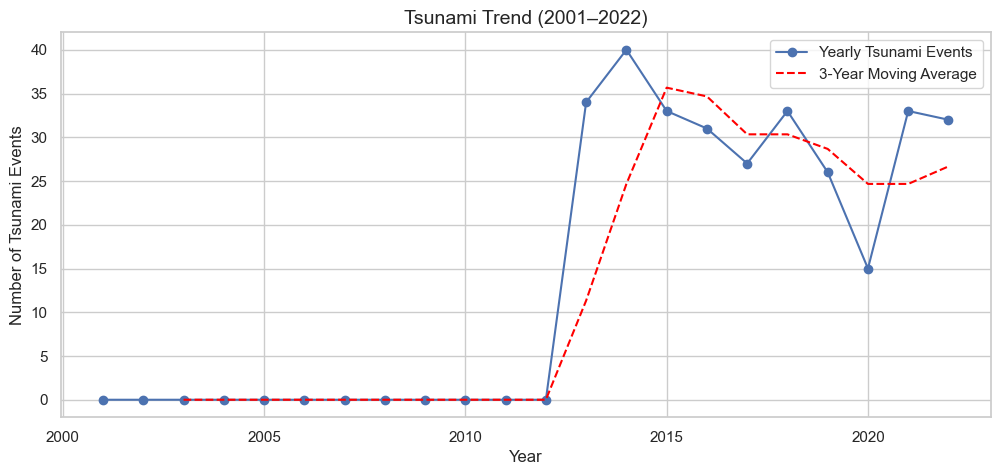

In [17]:
plt.figure(figsize=(12,5))
plt.plot(summary.index, summary["Tsunami_Events"], label="Yearly Tsunami Events", marker='o')
plt.plot(summary.index, summary["Tsunami_Trend"], label="3-Year Moving Average", linestyle='--', color='red')
plt.title("Tsunami Trend (2001–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Tsunami Events")
plt.legend()
plt.grid(True)
plt.show()

### Identify any trends in the frequency or magnitude of earthquakes over time.

In [17]:
#Group by year
yearly_data = df.groupby("Year").agg({
    "magnitude": "mean",   # Average magnitude per year
}).rename(columns={"magnitude": "Avg_Magnitude"})

# Add total number of earthquakes per year (frequency)
yearly_data["Total_Earthquakes"] = df.groupby("Year").size()

# Display summary
display(yearly_data)

,Avg_Magnitude,Total_Earthquakes
Year,,
2001,7.028571,28
2002,6.900000,25
2003,6.889032,31
2004,6.959375,32
2005,6.942857,28
2006,6.942308,26
2007,7.054054,37
2008,6.900000,25
2009,7.161538,26


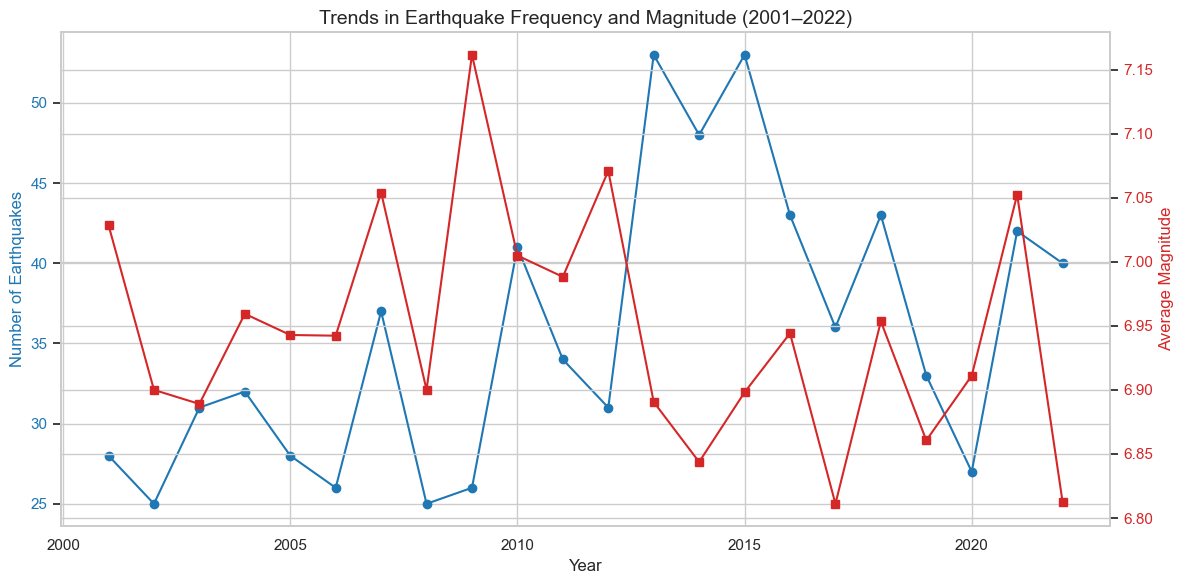

In [23]:
#Plot frequency and magnitude trends
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot total earthquakes (left axis)
ax1.plot(yearly_data.index, yearly_data["Total_Earthquakes"], color='tab:blue', marker='o', label='Total Earthquakes')
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Earthquakes", color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot average magnitude (right axis)
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data["Avg_Magnitude"], color='tab:red', marker='s', label='Average Magnitude')
ax2.set_ylabel("Average Magnitude", color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')


# Add title and grid
plt.title("Trends in Earthquake Frequency and Magnitude (2001–2022)", fontsize=14)
fig.tight_layout()
plt.grid(True)
plt.show()

# Magnitude and Depth Analysis

### Analyze the distribution of earthquake magnitudes and depths

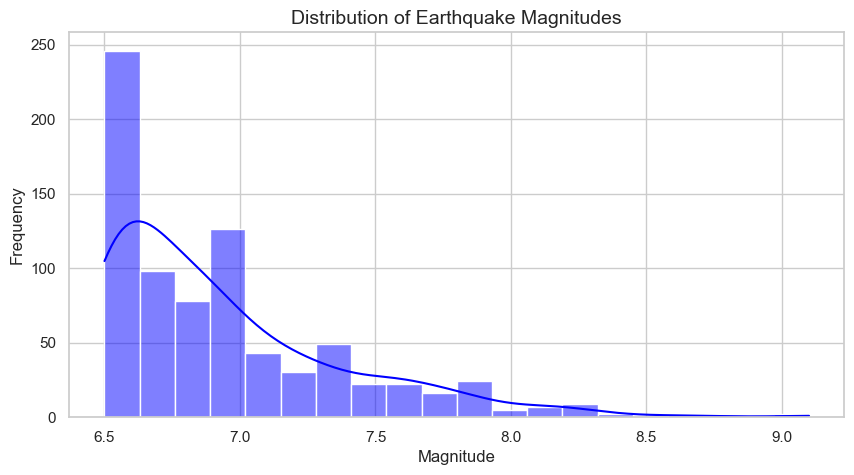

In [53]:
#Distribution of Magnitudes
plt.figure(figsize=(10,5))
sns.histplot(df["magnitude"], bins=20, kde=True, color='blue')
plt.title("Distribution of Earthquake Magnitudes", fontsize=14)
plt.xlabel("Magnitude", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

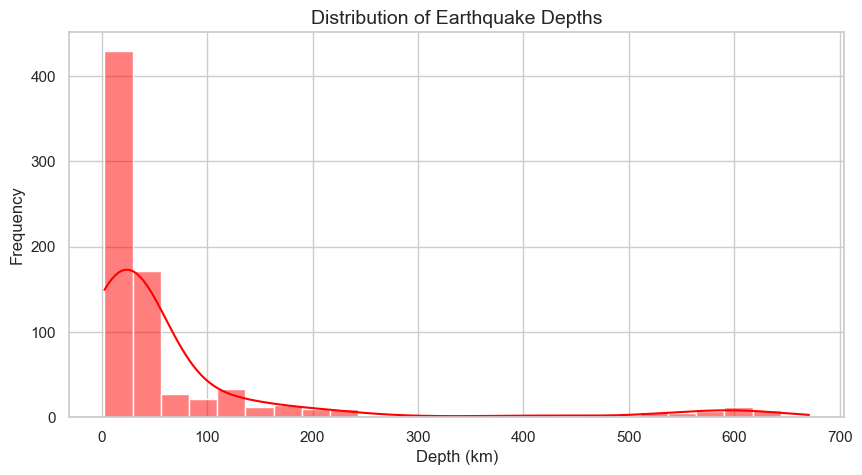

In [54]:
#Distribution of Depths
plt.figure(figsize=(10,5))
sns.histplot(df["depth"], bins=25, kde=True, color='Red')
plt.title("Distribution of Earthquake Depths", fontsize=14)
plt.xlabel("Depth (km)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

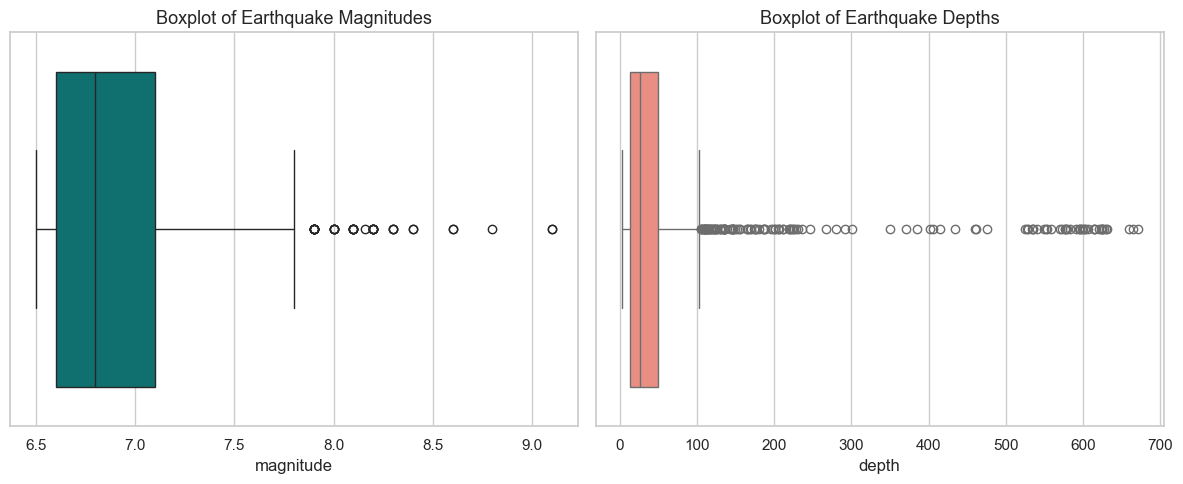

In [58]:
# Box plots for visual summary
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df["magnitude"], color='teal')
plt.title("Boxplot of Earthquake Magnitudes", fontsize=13)

plt.subplot(1,2,2)
sns.boxplot(x=df["depth"], color='salmon')
plt.title("Boxplot of Earthquake Depths", fontsize=13)

plt.tight_layout()
plt.show()

### Compare Average Magnitude & Depth — Tsunami vs Non-Tsunami Events

In [18]:
#Check that 'tsunami' column exists
print(df['tsunami'].value_counts())

tsunami
0    478
1    304
Name: count, dtype: int64


In [19]:
#Group and calculate averages
comparison = df.groupby("tsunami")[["magnitude", "depth"]].mean().reset_index()
comparison["Event_Type"] = comparison["tsunami"].map({0: "Non-Tsunami", 1: "Tsunami"})
comparison = comparison[["Event_Type", "magnitude", "depth"]]

display(comparison)

,Event_Type,magnitude,depth
0,Non-Tsunami,6.942803,69.667356
1,Tsunami,6.938487,85.656796


C:\Users\INDRAYANI\AppData\Local\Temp\ipykernel_7524\3043456991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Event_Type", y="magnitude", data=comparison, palette="Blues")
C:\Users\INDRAYANI\AppData\Local\Temp\ipykernel_7524\3043456991.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Event_Type", y="depth", data=comparison, palette="Oranges")


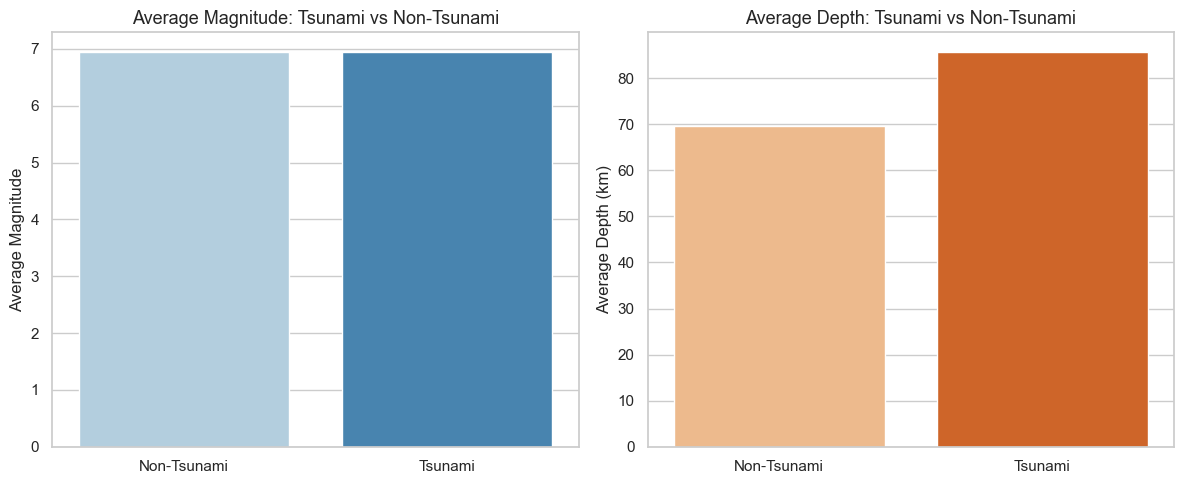

In [20]:
#Visualization — bar plots
plt.figure(figsize=(12,5))

# Average Magnitude
plt.subplot(1,2,1)
sns.barplot(x="Event_Type", y="magnitude", data=comparison, palette="Blues")
plt.title("Average Magnitude: Tsunami vs Non-Tsunami", fontsize=13)
plt.xlabel("")
plt.ylabel("Average Magnitude")


# Average Depth
plt.subplot(1,2,2)
sns.barplot(x="Event_Type", y="depth", data=comparison, palette="Oranges")
plt.title("Average Depth: Tsunami vs Non-Tsunami", fontsize=13)
plt.xlabel("")
plt.ylabel("Average Depth (km)")

plt.tight_layout()
plt.show()


### Highlight major earthquakes (≥8.0) and their characteristics.

In [32]:
# Filter major earthquakes (magnitude >= 8.0)
major_eq = df[df["magnitude"] >= 8.0].copy()

print(f"Total major earthquakes (≥8.0): {len(major_eq)}")

Total major earthquakes (≥8.0): 28


In [33]:
#Display their key characteristics
display(major_eq[["Year", "Month", "latitude", "longitude", "depth", "magnitude", "tsunami"]].sort_values(by="magnitude", ascending=False))

,Year,Month,latitude,longitude,depth,magnitude,tsunami
668,2004,12,3.2950,95.9820,30.00,9.10,0
476,2011,3,38.2970,142.3730,29.00,9.10,0
517,2010,2,-36.1220,-72.8980,22.90,8.80,0
441,2012,4,2.3270,93.0630,20.00,8.60,0
657,2005,3,2.0850,97.1080,30.00,8.60,0
767,2001,6,-16.2650,-73.6410,33.00,8.40,0
593,2007,9,-4.4380,101.3670,34.00,8.40,0
614,2006,11,46.5920,153.2660,10.00,8.30,0
393,2013,5,54.8920,153.2210,598.10,8.30,1
285,2015,9,-31.5729,-71.6744,22.44,8.30,1


In [34]:
# Summary statistics of major earthquakes
summary_stats = major_eq[["magnitude", "depth"]].describe()
print("Summary of major earthquake characteristics:")
display(summary_stats)

Summary of major earthquake characteristics:


,magnitude,depth
count,28.000000,28.000000
mean,8.280714,73.227857
std,0.303631,150.047721
min,8.000000,10.000000
25%,8.100000,22.872500
50%,8.200000,28.965000
75%,8.325000,40.915000
max,9.100000,600.000000


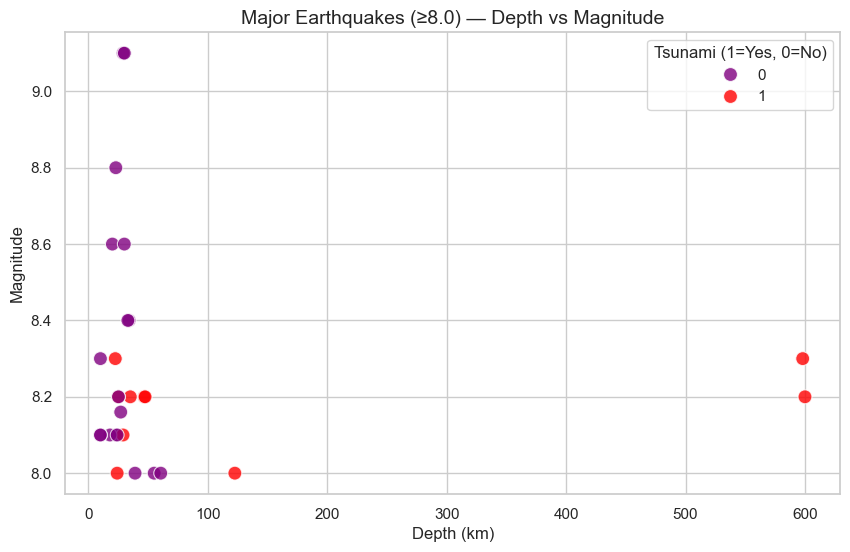

In [48]:
#Visualization — Magnitude and Depth
plt.figure(figsize=(10,6))
sns.scatterplot(data=major_eq,x="depth",y="magnitude",hue="tsunami",palette={0: "purple", 1: "red"},
    s=100,alpha=0.8)
plt.title("Major Earthquakes (≥8.0) — Depth vs Magnitude", fontsize=14)
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.legend(title="Tsunami (1=Yes, 0=No)")
plt.grid(True)
plt.show()

In [39]:
#Count how many caused tsunamis
tsunami_counts = major_eq["tsunami"].value_counts()
print("Tsunami involvement among major earthquakes:")
print(tsunami_counts)

Tsunami involvement among major earthquakes:
tsunami
0    18
1    10
Name: count, dtype: int64


# Geographic Distribution Using 2D 

### Plot earthquake locations using latitude and longitude on a 2D scatter plot.

In [42]:
#Basic check
print(df[["latitude", "longitude", "magnitude", "tsunami"]].head())

   latitude  longitude  magnitude  tsunami
0   -9.7963    159.596        7.0        1
1   -4.9559    100.738        6.9        0
2  -20.0508   -178.346        7.0        1
3  -19.2918   -172.129        7.3        1
4  -25.5948    178.278        6.6        1


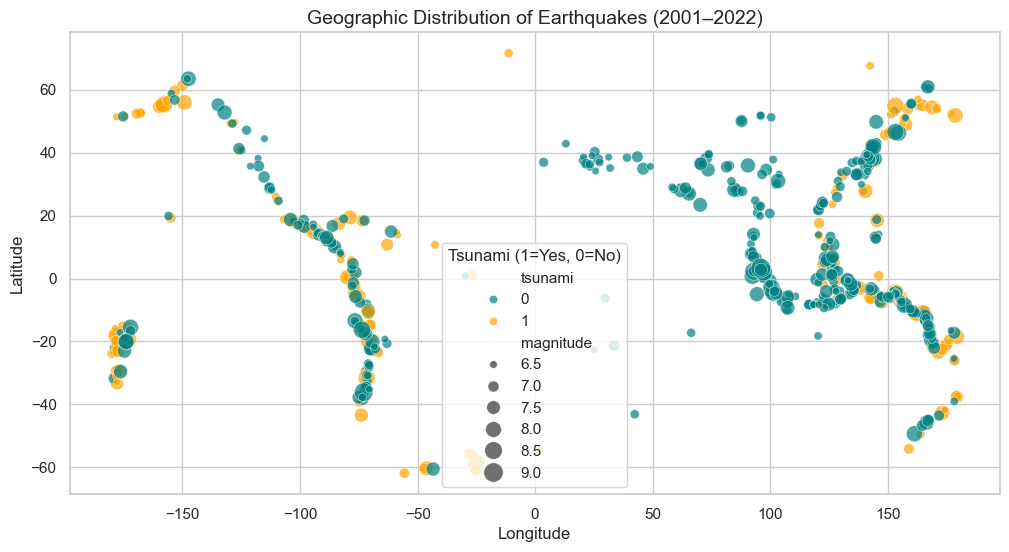

In [59]:
#Create 2D scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="longitude", y="latitude",hue="tsunami",size="magnitude",sizes=(30, 200),alpha=0.7,
    palette={0: "Teal", 1: "Orange"}
)
#Add chart details
plt.title("Geographic Distribution of Earthquakes (2001–2022)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Tsunami (1=Yes, 0=No)")
plt.grid(True)
plt.show()

### Visually distinguish between tsunami and non-tsunami events.

In [21]:
# visually distinguish between tsunami and non-tsunami events
# Ensure correct column names
# (Update column names below if your dataset uses different ones)
latitude_col = 'latitude'
longitude_col = 'longitude'
tsunami_col = 'tsunami'

In [22]:
# Drop rows with missing coordinates
df = df.dropna(subset=[latitude_col, longitude_col])

In [23]:
# Separate tsunami and non-tsunami events
tsunami_events = df[df[tsunami_col] == 1]
non_tsunami_events = df[df[tsunami_col] == 0]

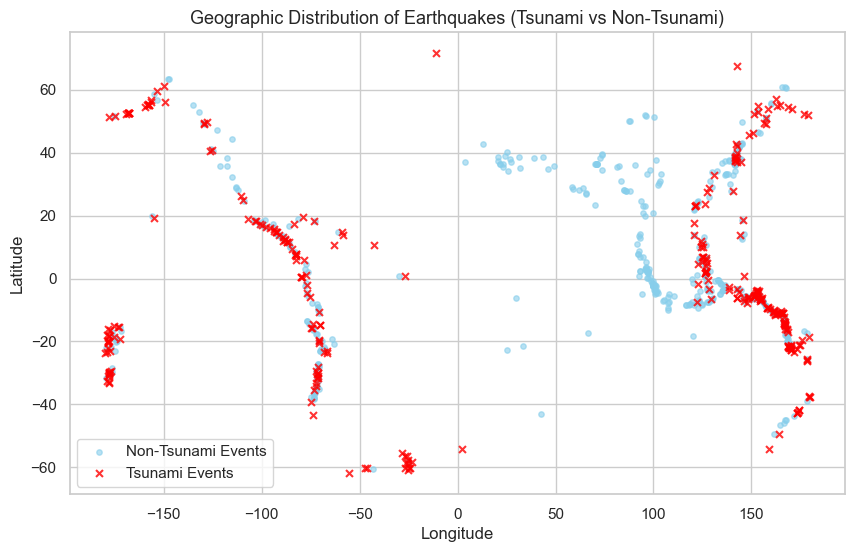

In [24]:
# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(non_tsunami_events[longitude_col],
            non_tsunami_events[latitude_col],
            color='skyblue', s=15, label='Non-Tsunami Events', alpha=0.6)
plt.scatter(tsunami_events[longitude_col],
            tsunami_events[latitude_col],
            color='red', s=25, marker='x', label='Tsunami Events', alpha=0.8)

# Add title and labels
plt.title("Geographic Distribution of Earthquakes (Tsunami vs Non-Tsunami)", fontsize=13)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

### Identify clusters or regions with higher concentration of tsunami events (without using map tiles or interactive maps).

In [25]:
# Column names
latitude_col = 'latitude'
longitude_col = 'longitude'
tsunami_col = 'tsunami'

# Filter only tsunami events
tsunami_df = df[df[tsunami_col] == 1].dropna(subset=[latitude_col, longitude_col])

print("Total tsunami events:", tsunami_df.shape[0])


Total tsunami events: 304


In [26]:
# Define bin size (smaller = more precise regions)
lat_bin_size = 5      # degrees
lon_bin_size = 5      # degrees

In [27]:
# Assign each event to a latitude and longitude bin
tsunami_df['lat_bin'] = (tsunami_df[latitude_col] // lat_bin_size) * lat_bin_size
tsunami_df['lon_bin'] = (tsunami_df[longitude_col] // lon_bin_size) * lon_bin_size

In [28]:
# Group by grid cell (bin) and count number of tsunami events
cluster_counts = tsunami_df.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='count')

# Keep only regions with multiple tsunami events (to highlight clusters)
significant_clusters = cluster_counts[cluster_counts['count'] > 2]

print("Regions with higher tsunami concentration:")
display(significant_clusters.sort_values('count', ascending=False).head(10))

Regions with higher tsunami concentration:


,lat_bin,lon_bin,count
31,-15.0,165.0,15
37,-10.0,150.0,12
23,-20.0,-180.0,9
22,-25.0,170.0,9
38,-10.0,155.0,9
78,35.0,140.0,9
30,-15.0,160.0,9
53,5.0,125.0,8
44,-5.0,150.0,7
14,-35.0,-75.0,7


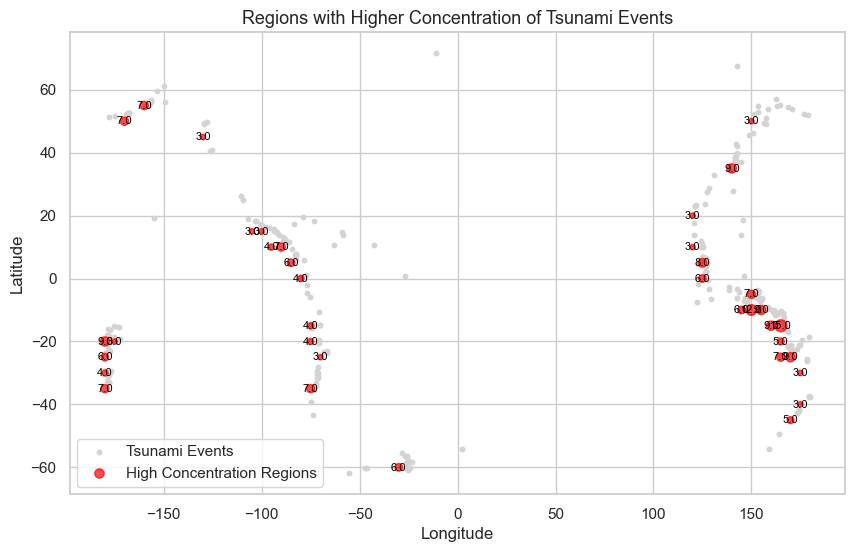

In [29]:
plt.figure(figsize=(10,6))

# Scatter all tsunami events (light gray)
plt.scatter(tsunami_df[longitude_col], tsunami_df[latitude_col],
            s=10, color='lightgray', label='Tsunami Events')

# Overlay high-density regions
plt.scatter(significant_clusters['lon_bin'], significant_clusters['lat_bin'],
            s=significant_clusters['count']*5,  # bubble size = number of events
            color='red', alpha=0.7, label='High Concentration Regions')

# Add labels
for _, row in significant_clusters.iterrows():
    plt.text(row['lon_bin'], row['lat_bin'], str(row['count']),
             fontsize=8, ha='center', va='center', color='black')

plt.title("Regions with Higher Concentration of Tsunami Events", fontsize=13)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


# Statistical and Comparative Analysis

### Use box plots, histograms, and bar charts to compare seismic features between tsunami and non-tsunami events.

In [31]:
# Define column names
magnitude_col = 'magnitude'
depth_col = 'depth'
tsunami_col = 'tsunami'

# Clean and separate data
df = df.dropna(subset=[magnitude_col, depth_col, tsunami_col])
tsunami_df = df[df[tsunami_col] == 1]
non_tsunami_df = df[df[tsunami_col] == 0]

print("Tsunami events:", len(tsunami_df))
print("Non-tsunami events:", len(non_tsunami_df))

Tsunami events: 304
Non-tsunami events: 478


C:\Users\INDRAYANI\AppData\Local\Temp\ipykernel_7524\136186699.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_tsunami_df[magnitude_col], tsunami_df[magnitude_col]],
C:\Users\INDRAYANI\AppData\Local\Temp\ipykernel_7524\136186699.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_tsunami_df[depth_col], tsunami_df[depth_col]],


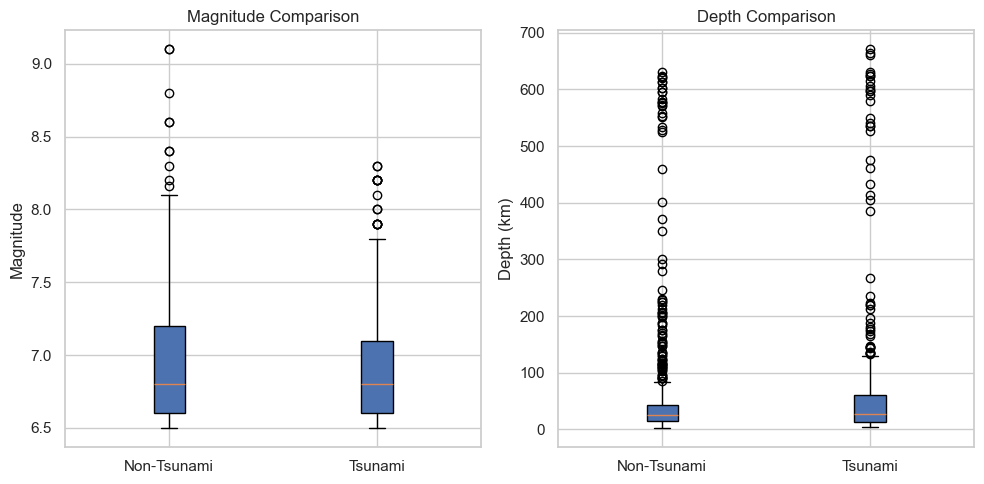

In [32]:
plt.figure(figsize=(10,5))
# Boxplot for Magnitude
plt.subplot(1,2,1)
plt.boxplot([non_tsunami_df[magnitude_col], tsunami_df[magnitude_col]],
            labels=['Non-Tsunami', 'Tsunami'], patch_artist=True)
plt.title('Magnitude Comparison')
plt.ylabel('Magnitude')

# Boxplot for Depth
plt.subplot(1,2,2)
plt.boxplot([non_tsunami_df[depth_col], tsunami_df[depth_col]],
            labels=['Non-Tsunami', 'Tsunami'], patch_artist=True)
plt.title('Depth Comparison')
plt.ylabel('Depth (km)')

plt.tight_layout()
plt.show()


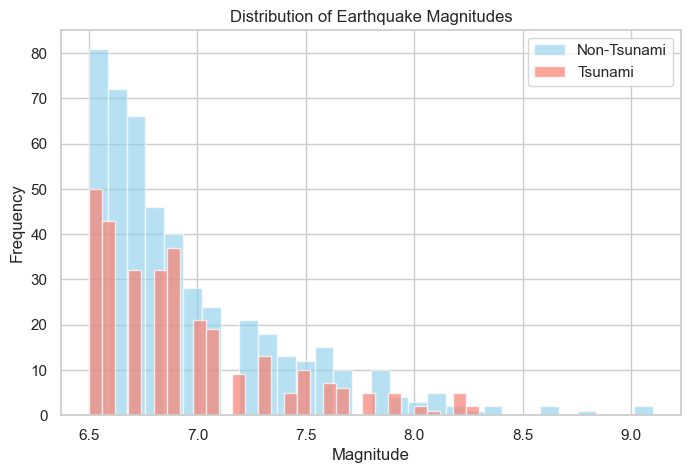

In [33]:
#Histogram — Distribution of Magnitudes
plt.figure(figsize=(8,5))
plt.hist(non_tsunami_df[magnitude_col], bins=30, alpha=0.6, label='Non-Tsunami', color='skyblue')
plt.hist(tsunami_df[magnitude_col], bins=30, alpha=0.7, label='Tsunami', color='salmon')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.legend()
plt.grid(True)
plt.show()


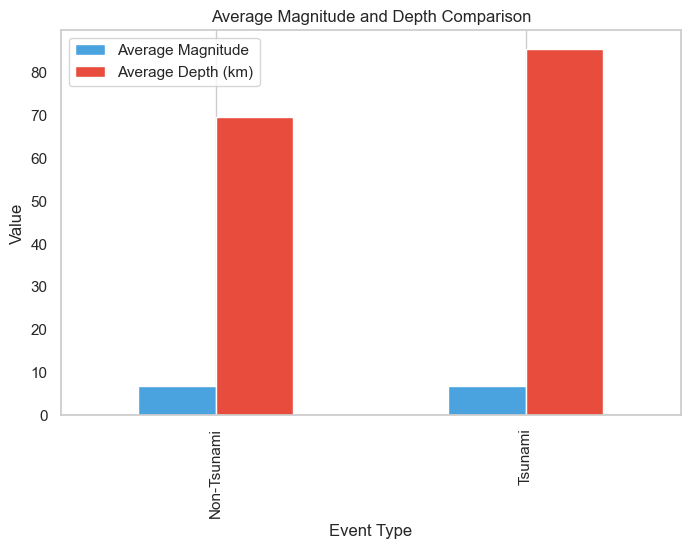

In [34]:
#Bar plot
# Calculate average magnitude and depth
avg_data = {
    'Event Type': ['Non-Tsunami', 'Tsunami'],
    'Average Magnitude': [non_tsunami_df[magnitude_col].mean(), tsunami_df[magnitude_col].mean()],
    'Average Depth (km)': [non_tsunami_df[depth_col].mean(), tsunami_df[depth_col].mean()]
}
avg_df = pd.DataFrame(avg_data)

# Plot bar charts
avg_df.plot(x='Event Type', y=['Average Magnitude', 'Average Depth (km)'], kind='bar',
            figsize=(8,5), color=['#4aa3df', '#e74c3c'])
plt.title("Average Magnitude and Depth Comparison")
plt.ylabel("Value")
plt.grid(axis='y')
plt.show()


### Analyze correlations between variables using heatmaps

In [35]:
# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation values
print("Correlation Matrix:")
display(corr_matrix)

Correlation Matrix:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


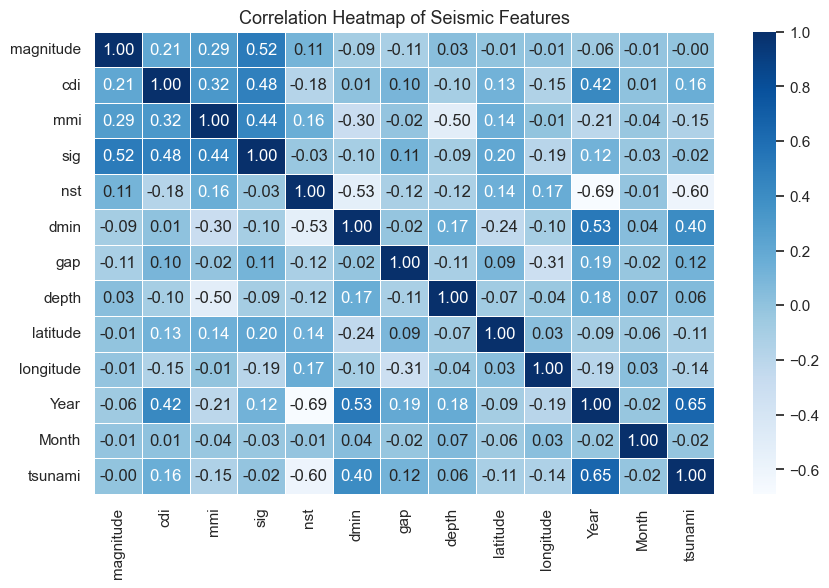

In [37]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Seismic Features", fontsize=13)
plt.show()

# Insights and Observations

Tsunami earthquakes are usually strong (≥6.5 magnitude) and shallow (depth ≤70 km).

They mostly occur along subduction zones like the Pacific Ring of Fire.

Non-tsunami earthquakes have a wider range of depths and magnitudes and are more spread out.

Tsunami events show regional clustering, while non-tsunami ones are more frequent but less concentrated.

Indicators of tsunami potential: high magnitude, shallow depth, and oceanic location near tectonic boundaries.